In [59]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
img_path = 'data/lena.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [60]:
cv2.imshow('hsv', img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 改變飽和度

In [61]:

change_percentage = 0.2
# update the 2nd dimension of image depth, index is 1
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[:,:, 1] = img_hsv_down[:,:, 1]/255 - change_percentage
img_hsv_down[img_hsv_down[:,:, 1] < 0] = 0
img_hsv_down[:,:, 1] = img_hsv_down[:,:, 1]*255
img_hsv_down = img_hsv_down.astype('uint8')

In [62]:
# update the 2nd dimension of image depth, index is 1
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[:,:, 1] = img_hsv_up[:,:, 1]/255 + change_percentage
img_hsv_up[img_hsv_up[:,:, 1] > 1] = 1
img_hsv_up[:,:, 1] = img_hsv_up[:,:, 1]*255
img_hsv_up = img_hsv_up.astype('uint8')

In [63]:
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

In [64]:
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))

In [65]:
cv2.imshow('change saturation', img_hsv_change)
cv2.waitKey(0)
cv2.destroyAllWindows()

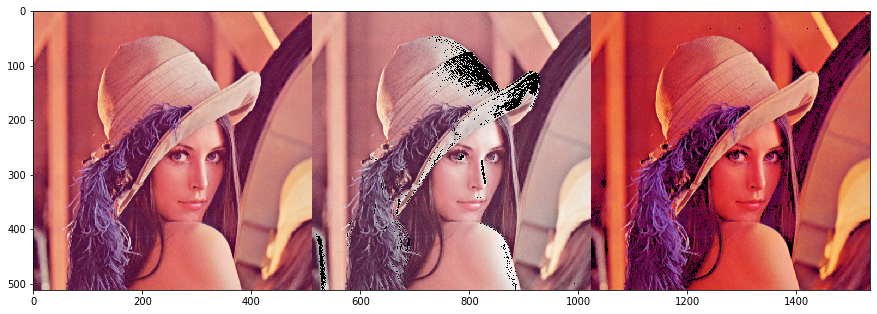

In [66]:
plt.figure(figsize=(15,10))
plt.imshow(img_hsv_change[:,:,::-1])

## 直方圖均衡

In [68]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = cv2.imread(img_path, cv2.IMREAD_COLOR)
channels = cv2.split(img)
cv2.equalizeHist(channels[0], channels[0])
cv2.equalizeHist(channels[1], channels[1])
cv2.equalizeHist(channels[2], channels[2])

array([[216, 216, 205, ..., 226, 197, 135],
       [216, 216, 205, ..., 226, 197, 135],
       [216, 216, 205, ..., 226, 197, 135],
       ...,
       [  8,   8,  19, ...,  90,  89,  97],
       [  6,   6,  25, ..., 101, 103, 109],
       [  6,   6,  25, ..., 101, 103, 109]], dtype=uint8)

In [69]:
# 組合經過直方圖均衡的每個 channel
cv2.merge(channels, equalHist_by_channel)
img_bgr_equalHist = np.hstack((img, equalHist_by_channel))

In [70]:
cv2.imshow('bgr equal by channel', img_bgr_equalHist)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
channels = cv2.split(img_hsv_equal)
cv2.equalizeHist(channels[2], channels[2])
# 組合圖片 + 顯示圖片
cv2.merge(channels, img_hsv_equal)
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2BGR)
img_bgr_equalHist = np.hstack((img, equalHist_by_channel, img_hsv_equal))
cv2.imshow('bgr equal by every channel and only one channel', img_bgr_equalHist)
cv2.waitKey(0)
cv2.destroyAllWindows()

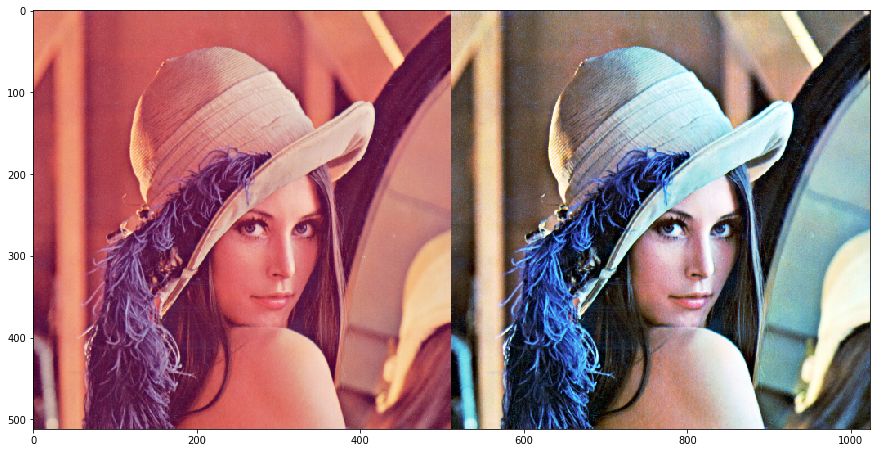

In [71]:
plt.figure(figsize=(15,10))
plt.imshow(img_bgr_equalHist[:,:,::-1])

## 調整對比和明亮

In [72]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
cv2.imshow('adjust contrast and brighness', img_contrast_light)
cv2.waitKey(0)
cv2.destroyAllWindows()

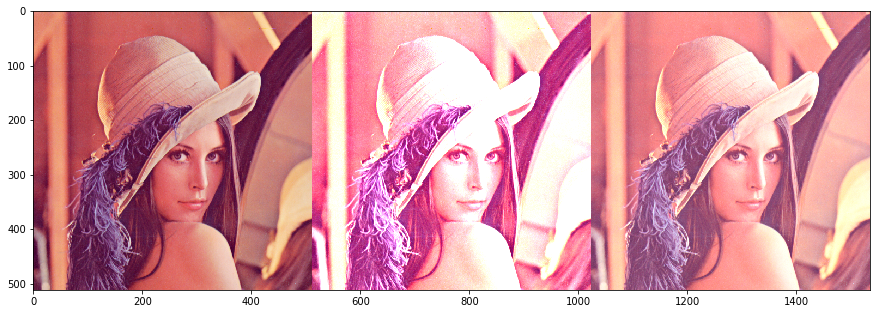

In [73]:
plt.figure(figsize=(15,10))
plt.imshow(img_contrast_light[:,:,::-1])